In [2]:
from ultralytics import YOLO
import cv2
from pathlib import Path
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO("yolov8m")

100%|██████████| 49.7M/49.7M [00:53<00:00, 981kB/s] 


## Prediction on Image with YOLO


0: 288x640 9 persons, 64.2ms
Speed: 1.1ms preprocess, 64.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 640)


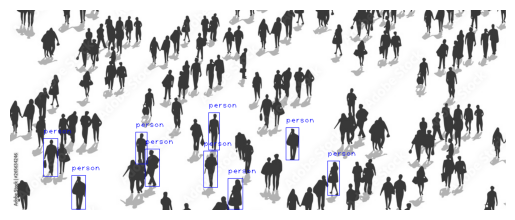

In [95]:
IMAGE_PATH = '/tf/Test Pics/people.jpg'
img = cv2.imread(IMAGE_PATH)

# Function to predict with the chosen model
def predict(chosen_model, img, classes=[], conf=0.5):
    # Check if classes are specified for filtering
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

# Function to draw bounding boxes and class names on the image
def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=1, text_thickness=1):
    results = predict(chosen_model, img, classes, conf=conf)
    
    # Loop over detected results
    for result in results:
        # Loop over each detected box in the result
        for box in result.boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = int(box.xyxy[0][0]), int(box.xyxy[0][1]), int(box.xyxy[0][2]), int(box.xyxy[0][3])
            
            # Draw rectangle for bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), rectangle_thickness)
            
            # Draw class label on the image
            class_name = result.names[int(box.cls[0])]
            cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    
    return img, results

# Example usage
# result_img will contain the image with bounding boxes drawn on it
result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)

import matplotlib.pyplot as plt

def show_image_inline(img):
    # Convert BGR (OpenCV format) to RGB (matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()

show_image_inline(result_img)

# Save the image to the specified path
# cv2.imwrite("YourSavePath/result_img.jpg", result_img)


## Prediction on Video with YOLO

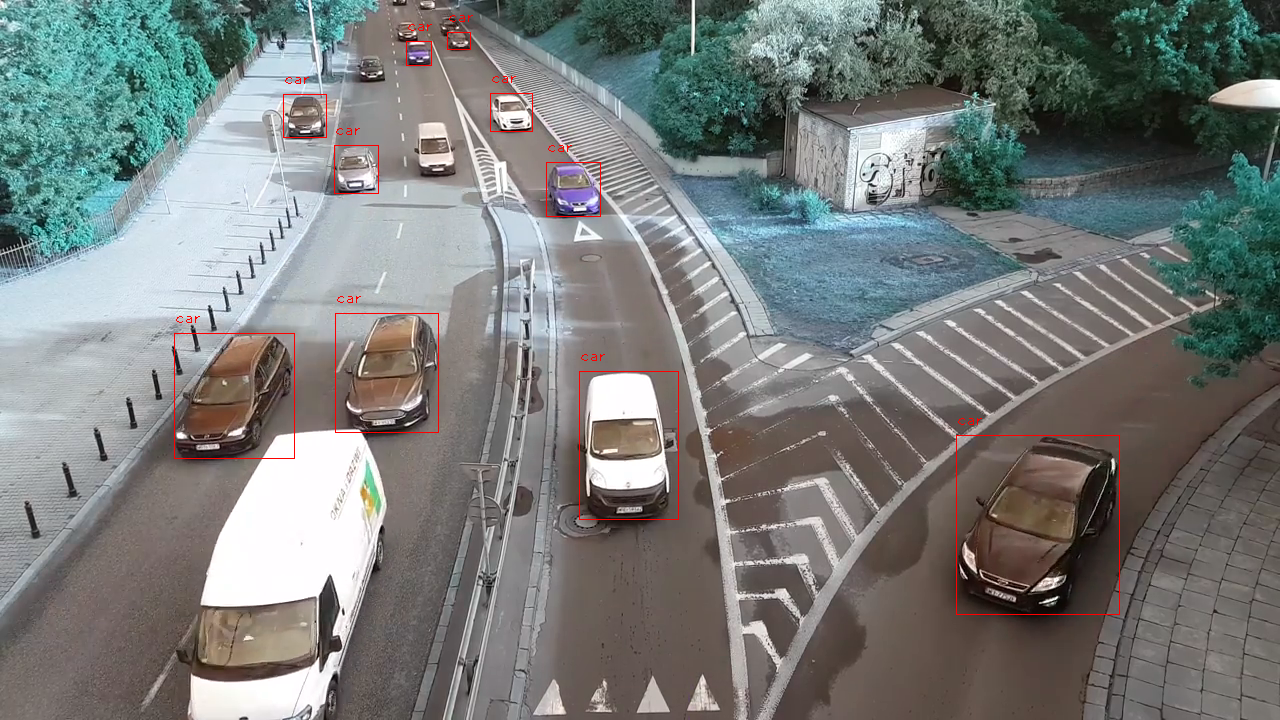

In [99]:
from IPython.display import display, clear_output
from PIL import Image

video_path = r"/tf/Test Videos/Traffic.mp4"
cap = cv2.VideoCapture(video_path)

def show_image_inline(img):
    # Convert BGR (OpenCV format) to RGB (matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Function to predict with the chosen model
def predict(chosen_model, img, classes=[], conf=0.5):
    # Check if classes are specified for filtering
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

# Function to show video inside Jupyter notebook
def show_video_in_notebook(video_path, model, classes=[], conf=0.5):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Check if video loaded successfully
    if not video.isOpened():
        print("Error opening video file")
        return
    
    rectangle_thickness = 1
    text_thickness = 1
    while video.isOpened():
        ret, frame = video.read()
        
        # Break the loop if there are no more frames
        if not ret:
            break
        
        # Convert the image to RGB (because OpenCV loads in BGR format)
        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Perform inference using YOLO model
        results = predict(model, img_rgb, classes, conf=conf)

        # Check if results is a list (for YOLOv8)
        if isinstance(results, list):
            # Assuming we want the first result (if there are multiple images in a batch)
            results = results[0]
        
         # Loop over detected results
        for result in results:
            # Loop over each detected box in the result
            for box in result.boxes:
                # Extract bounding box coordinates
                x1, y1, x2, y2 = int(box.xyxy[0][0]), int(box.xyxy[0][1]), int(box.xyxy[0][2]), int(box.xyxy[0][3])
                
                # Draw rectangle for bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), rectangle_thickness)
                
                # Draw class label on the image
                class_name = result.names[int(box.cls[0])]
                cv2.putText(frame, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)

        # Convert the result from numpy array to an Image object to display in Jupyter
        im_pil = Image.fromarray(frame)

        # Display the image in the notebook
        clear_output(wait=True)  # Clear previous output
        display(im_pil)
        
    # Release the video object
    video.release()


show_video_in_notebook(video_path, model)